<a href="https://colab.research.google.com/github/abdullahkhafabi-010/MACHINE-LEARNING/blob/main/Kuis1/quiz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install torch torchvision numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download the MNIST dataset using torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

c:\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Extract the data and labels
data = mnist_dataset.data
labels = mnist_dataset.targets

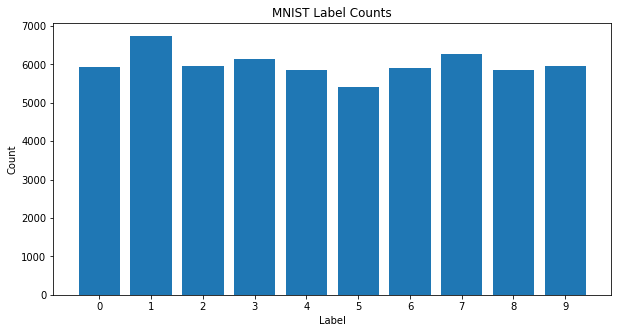

In [ ]:
# 1. Count the size of each label
label_counts = torch.bincount(labels)

# Plot a bar chart to visualize the label counts
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('MNIST Label Counts')
plt.show()

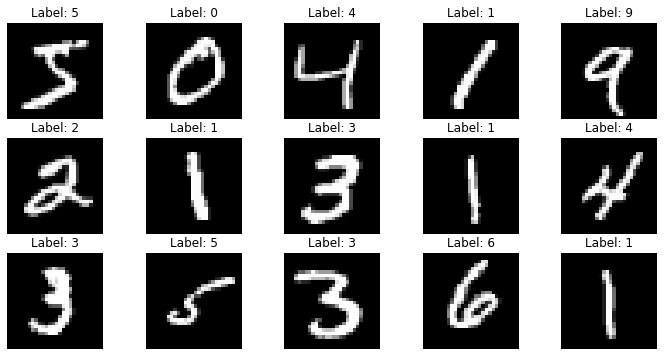

In [ ]:
# 2. Display the first 15 images along with their labels
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.show()

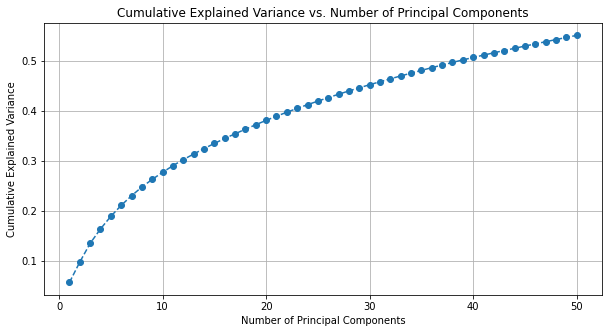

In [ ]:
# 3. Do PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reshape the data to 1D arrays (flatten)
data = data.reshape(data.shape[0], -1)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Perform PCA with the desired number of components (e.g., 50)
n_components = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_std)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()


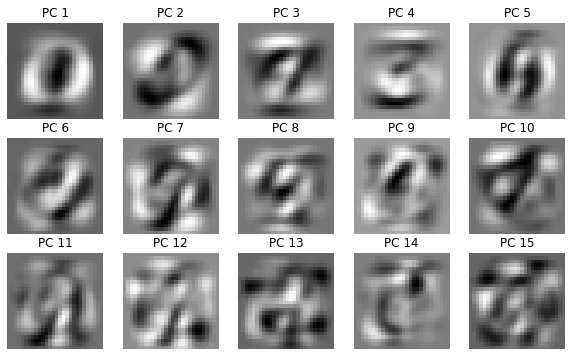

In [ ]:
# Visualize the first 15 principal components (eigendigits)
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i in range(15):
    axi = ax[i // 5, i % 5]
    eigendigit = pca.components_[i].reshape(28, 28)
    axi.imshow(eigendigit, cmap='gray')
    axi.set_title(f'PC {i + 1}')
    axi.axis('off')

plt.show()

In [ ]:
# 4. Split data for testing and training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.3)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    data_pca, labels, test_size=0.2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    data_pca, labels, test_size=0.1)

# Verify the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])


In [ ]:
# 5, 6, 7 fit your data (using linear kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_model = SVC(kernel='linear')

# Fit the SVM model to the training data
linear_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = linear_model.predict(X_test)


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1834
           1       0.96      0.98      0.97      2016
           2       0.91      0.93      0.92      1789
           3       0.90      0.91      0.91      1836
           4       0.93      0.94      0.94      1741
           5       0.90      0.89      0.90      1633
           6       0.97      0.96      0.97      1759
           7       0.95      0.94      0.94      1960
           8       0.91      0.87      0.89      1732
           9       0.92      0.91      0.91      1700

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000

Confusion Matrix:
 [[1783    1    8    5    1   15    5    1   12    3]
 [   1 1970   13    6    3    2    2    3   15    1]
 [  15   12 1656   19   19   10   11    9   32    6]
 [   7   13   40 1673   

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 93.17%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1834
           1       0.96      0.98      0.97      2016
           2       0.91      0.93      0.92      1789
           3       0.90      0.91      0.91      1836
           4       0.93      0.94      0.94      1741
           5       0.90      0.89      0.90      1633
           6       0.97      0.96      0.97      1759
           7       0.95      0.94      0.94      1960
           8       0.91      0.87      0.89      1732
           9       0.92      0.91      0.91      1700

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000

Confusion Matrix:
 [[1783    1    8    5    1   15    5    1   12    3]
 [   1 1970   13    6    3    2    2    3   15    1]
 [  15   12 1656   19   19   10   11    9   32    6]
 [   7   13   40 1673 

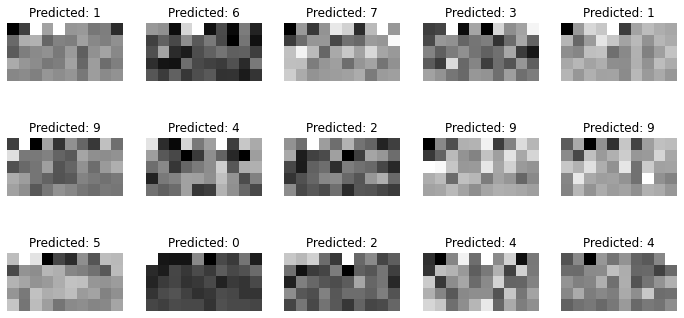

In [ ]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [ ]:
# 5, 6, 7 fit your data (using rbf kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_model = SVC(kernel='rbf')

# Fit the SVM model to the training data
rbf_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = rbf_model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 96.92%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1834
           1       0.98      0.98      0.98      2016
           2       0.96      0.97      0.97      1789
           3       0.96      0.96      0.96      1836
           4       0.97      0.97      0.97      1741
           5       0.97      0.97      0.97      1633
           6       0.98      0.98      0.98      1759
           7       0.96      0.97      0.96      1960
           8       0.97      0.96      0.96      1732
           9       0.95      0.95      0.95      1700

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000

Confusion Matrix:
 [[1808    2    1    1    0    3    8    4    5    2]
 [   1 1983   14    6    3    0    1    4    3    1]
 [   5    5 1744   10    3    2    1    8    8    3]
 [   3    5   13 1756 

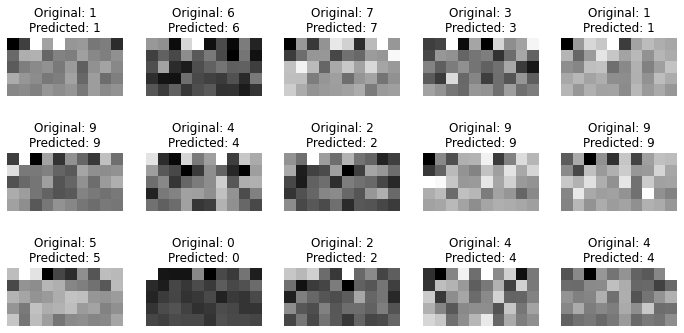

In [ ]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [ ]:
# 5, 6, 7 fit your data (using polynomial kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

poly_model = SVC(kernel='poly', degree=3)

# Fit the SVM model to the training data
poly_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = poly_model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 96.43%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1834
           1       0.99      0.98      0.98      2016
           2       0.97      0.96      0.97      1789
           3       0.96      0.94      0.95      1836
           4       0.95      0.97      0.96      1741
           5       0.97      0.97      0.97      1633
           6       0.98      0.97      0.98      1759
           7       0.98      0.96      0.97      1960
           8       0.91      0.97      0.94      1732
           9       0.94      0.95      0.95      1700

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000

Confusion Matrix:
 [[1785    1    1    1    2    6    7    3   26    2]
 [   0 1973   14    6    5    0    2    3   11    2]
 [   5    2 1724    8    6    1    3    6   32    2]
 [   1    3   14 1734 

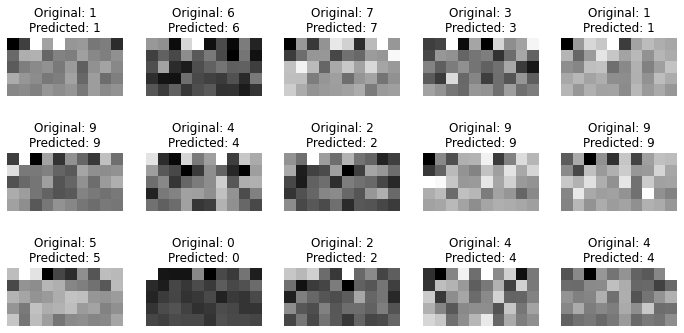

In [ ]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [ ]:
# 5, 6, 7 fit your data (using sigmoid kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sigmoid_model = SVC(kernel='sigmoid', degree=3)

# Fit the SVM model to the training data
sigmoid_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = sigmoid_model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 78.53%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79      1834
           1       0.88      0.94      0.91      2016
           2       0.74      0.74      0.74      1789
           3       0.75      0.78      0.77      1836
           4       0.84      0.78      0.81      1741
           5       0.72      0.68      0.70      1633
           6       0.85      0.80      0.83      1759
           7       0.78      0.82      0.80      1960
           8       0.83      0.68      0.75      1732
           9       0.72      0.74      0.73      1700

    accuracy                           0.79     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.79      0.78     18000

Confusion Matrix:
 [[1576    1   47   13    4  139   19    9   16   10]
 [   0 1899   37   21    3    5    2   15   30    4]
 [  93   58 1321   58   24   12  115   33   41   34]
 [  41   33   90 1438 

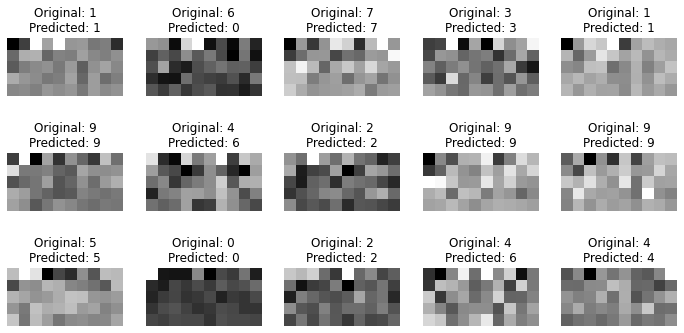

In [ ]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In the case of the MNIST dataset, the choice of kernel can indeed have a significant impact on the performance of an SVM model. Let's discuss why the RBF kernel might have the highest accuracy score among the kernels you've tested in the context of the MNIST dataset:

1. **Complexity of Data:** The MNIST dataset consists of handwritten digits, which can vary greatly in writing style and stroke patterns. Many of the relationships between pixel values and digit classes are non-linear and complex. The RBF kernel, being highly flexible and capable of modeling non-linear patterns, can capture these intricate variations effectively.

2. **High-Dimensional Data:** The MNIST dataset is relatively high-dimensional because each image has many pixels. The RBF kernel can implicitly map the data to a higher-dimensional space, where it might be easier to find decision boundaries that separate the classes well. This property is particularly advantageous when dealing with high-dimensional data.

3. **Generalization:** The RBF kernel is known for its ability to generalize well to various datasets. It is often considered a safe choice when you're not sure about the linearity of the data or the underlying patterns.

4. **Hyperparameter Tuning:** The RBF kernel has a hyperparameter called `gamma` that controls the shape of the decision boundary. By tuning `gamma` appropriately, you can adapt the kernel to the specific characteristics of the MNIST dataset, which can lead to better performance.

5. **Balancing Complexity:** While the RBF kernel can capture complex patterns, it can also be regularized effectively with proper hyperparameter tuning to prevent overfitting. This balance between complexity and regularization makes it a strong candidate for the MNIST dataset.

It's important to note that the choice of kernel should still involve thorough experimentation and cross-validation. Depending on the specific MNIST subset or problem variation, other kernels such as linear or polynomial might perform well, especially if the data exhibits more linear separability.

In practice, it's advisable to perform a comprehensive hyperparameter search and model evaluation to select the kernel and parameters that yield the best overall performance for your particular use case.